In [ ]:
import snap
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 1

In [2]:
# Setup
erdosRenyi = None
smallWorld = None
collabNet = None


In [3]:
# Problem 1.1
def genErdosRenyi(N=5242, E=14484):
    """
    :param - N: number of nodes
    :param - E: number of edges
    return type: snap.PUNGraph
    return: Erdos-Renyi graph with N nodes and E edges
    """
    ############################################################################
    Graph = snap.PUNGraph.New()
    for i in range(N):
        Graph.AddNode(i)
    nums = np.arange(N * (N - 1) // 2)
    nums = np.random.permutation(nums)
    ram = set()
    for idx in nums:
        u = int(idx // N)
        v = int(idx % N)
        if u != v and (u, v) not in ram and (v, u) not in ram:
            ram.add((u, v))
            Graph.AddEdge(u, v)

        if len(ram) == E:
            break
    ############################################################################
    return Graph

In [4]:
def genCircle(N=5242):
    """
    :param - N: number of nodes
    return type: snap.PUNGraph
    return: Circle graph with N nodes and N edges. Imagine the nodes form a
        circle and each node is connected to its two direct neighbors.
    """
    ############################################################################
    Graph = snap.PUNGraph.New()
    for i in range(N):
        Graph.AddNode(i)
    for i in range(N):
        Graph.AddEdge(i, (i + 1) % N)

    ############################################################################
    return Graph

In [5]:
def connectNbrOfNbr(Graph, N=5242):
    """
    :param - Graph: snap.PUNGraph object representing a circle graph on N nodes
    :param - N: number of nodes
    return type: snap.PUNGraph
    return: Graph object with additional N edges added by connecting each node
        to the neighbors of its neighbors
    """
    ############################################################################
    for i in range(N):
        Graph.AddEdge(i, (i + 2) % N)
    ############################################################################
    return Graph

In [6]:
def connectRandomNodes(Graph, M=4000):
    """
    :param - Graph: snap.PUNGraph object representing an undirected graph
    :param - M: number of edges to be added
    return type: snap.PUNGraph
    return: Graph object with additional M edges added by connecting M randomly
        selected pairs of nodes not already connected.
    """
    ############################################################################
    N = 0
    for node in Graph.Nodes():
        N += 1
    nums = np.arange(N * (N - 1) / 2)
    nums = np.random.permutation(nums)
    ram = set()

    for edge in Graph.Edges():
        ram.add((edge.GetSrcNId(), edge.GetDstNId()))
    M += len(ram)
    for idx in nums:
        u = int(idx // N)
        v = int(idx % N)
        if u != v and (u, v) not in ram and (v, u) not in ram:
            ram.add((u, v))
            Graph.AddEdge(u, v)
        if len(ram) == M:
            break

    ############################################################################
    return Graph

In [7]:
def genSmallWorld(N=5242, E=14484):
    """
    :param - N: number of nodes
    :param - E: number of edges
    return type: snap.PUNGraph
    return: Small-World graph with N nodes and E edges
    """
    Graph = genCircle(N)
    Graph = connectNbrOfNbr(Graph, N)
    Graph = connectRandomNodes(Graph, 4000)
    return Graph


In [8]:
def loadCollabNet(path):
    """
    :param - path: path to edge list file
    return type: snap.PUNGraph
    return: Graph loaded from edge list at `path and self edges removed
    Do not forget to remove the self edges!
    """
    ############################################################################
    # TODO: Your code here!
    Graph = snap.LoadEdgeList(snap.PUNGraph, path, 0, 1)
    for EI in Graph.Edges():
        if EI.GetSrcNId() == EI.GetDstNId():
            Graph.DelEdge(EI.GetSrcNId(), EI.GetDstNId())
    ############################################################################
    return Graph

In [10]:
def getDataPointsToPlot(Graph):
    """
    :param - Graph: snap.PUNGraph object representing an undirected graph
    return values:
    X: list of degrees
    Y: list of frequencies: Y[i] = fraction of nodes with degree X[i]
    """
    ############################################################################
    # TODO: Your code here!
    X, Y = [], []
    max_deg = 0
    for node in Graph.Nodes():
        max_deg = max(max_deg, node.GetDeg() + 1)
    X = list(range(max_deg))
    Y = [0] * len(X)
    for node in Graph.Nodes():
        Y[node.GetDeg()] += 1
    ############################################################################
    return X, Y

ER Graph Generation Complete:  5242 ,  14484
Small World Graph Generation Complete:  5242 ,  14484
CollabNet Load Complete:  5242 ,  14484


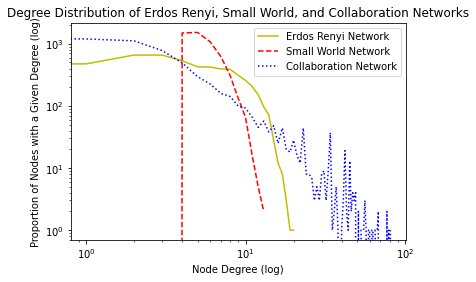

In [11]:
def Q1_1():
    """
    Code for HW1 Q1.1
    """
    global erdosRenyi, smallWorld, collabNet
    erdosRenyi = genErdosRenyi(5242, 14484)
    print("ER Graph Generation Complete: ", erdosRenyi.GetNodes(), ", ", erdosRenyi.GetEdges())
    smallWorld = genSmallWorld(5242, 14484)
    print("Small World Graph Generation Complete: ", smallWorld.GetNodes(), ", ", smallWorld.GetEdges())
    collabNet = loadCollabNet("CA-GrQc.txt")
    print("CollabNet Load Complete: ", collabNet.GetNodes(), ", ", collabNet.GetEdges())

    x_erdosRenyi, y_erdosRenyi = getDataPointsToPlot(erdosRenyi)
    plt.loglog(x_erdosRenyi, y_erdosRenyi, color='y', label='Erdos Renyi Network')

    x_smallWorld, y_smallWorld = getDataPointsToPlot(smallWorld)
    plt.loglog(x_smallWorld, y_smallWorld, linestyle='dashed', color='r', label='Small World Network')

    x_collabNet, y_collabNet = getDataPointsToPlot(collabNet)
    plt.loglog(x_collabNet, y_collabNet, linestyle='dotted', color='b', label='Collaboration Network')

    plt.xlabel('Node Degree (log)')
    plt.ylabel('Proportion of Nodes with a Given Degree (log)')
    plt.title('Degree Distribution of Erdos Renyi, Small World, and Collaboration Networks')
    plt.legend()
    plt.show()


# Execute code for Q1.1
Q1_1()

The log-log degree distribution plot is shown as belows. We can see that

• The Small World Network has the most narrow plot comparing to other two networks.

• Erdos Renyi Network is more similar with Collaboration Network, which means from the
degree distribution perspective, Erdos Renyi models the real networks better.

• Compared to random graph networks, the degree distribution of Collaboration Network is
more wider.

• It has more long-tail nodes which has large degree and small degree.

In [12]:
def calcClusteringCoefficientSingleNode(Node, Graph):
    """
    :param - Node: node from snap.PUNGraph object. Graph.Nodes() will give an
                   iterable of nodes in a graph
    :param - Graph: snap.PUNGraph object representing an undirected graph
    return type: float
    returns: local clustering coeffient of Node
    """
    ############################################################################
    # TODO: Your code here!
    C = 0.0
    neigbors = []
    deg = Node.GetDeg()
    for i in range(deg):
        neigbors.append(Graph.GetNI(Node.GetNbrNId(i)))
    cnt_nbr = 0
    for i in range(deg):
        for j in range(i):
            cnt_nbr += neigbors[i].IsInNId(neigbors[j].GetId())
    if deg >= 2:
        C = 2 * cnt_nbr / (deg * (deg - 1.0))
    ############################################################################
    return C

In [13]:
def calcClusteringCoefficient(Graph):
    """
    :param - Graph: snap.PUNGraph object representing an undirected graph
    return type: float
    returns: clustering coeffient of Graph
    """
    ############################################################################
    # TODO: Your code here! If you filled out calcClusteringCoefficientSingleNode,
    #       you'll probably want to call it in a loop here
    C = 0.0
    for node in Graph.Nodes():
        C += calcClusteringCoefficientSingleNode(node, Graph)
    C /= Graph.GetNodes()
    ############################################################################
    return C

In [14]:
def Q1_2():
    """
    Code for Q1.2
    """
    C_erdosRenyi = calcClusteringCoefficient(erdosRenyi)
    C_smallWorld = calcClusteringCoefficient(smallWorld)
    C_collabNet = calcClusteringCoefficient(collabNet)

    print('Clustering Coefficient for Erdos Renyi Network: %f' % C_erdosRenyi)
    print('Clustering Coefficient for Small World Network: %f' % C_smallWorld)
    print('Clustering Coefficient for Collaboration Network: %f' % C_collabNet)


# Execute code for Q1.2
Q1_2()

Clustering Coefficient for Erdos Renyi Network: 0.001683
Clustering Coefficient for Small World Network: 0.297136
Clustering Coefficient for Collaboration Network: 0.529636


We can see that Collaboration Network has the largest average clustering coefficient.
Since in real life, authors are likely to establish collaboration with those who have collaborated
with their collaborators, so the local structure of this subgraph tends to be dense, which results in
a larger average clustering coefficient.